In [1]:
import pandas as pd
import matplotlib.dates as mdates

In [2]:
# read data
data = pd.read_csv(r"../Data/Aggregated_Final_Lin_Rakeen_Fixed_returns.csv")

In [3]:
# copy without warnings
pd.options.mode.chained_assignment = None

In [4]:
# # make sweetviz report
# import sweetviz as sv

# report = sv.analyze(data)

# # save report
# report.show_html("../EDA/fixed_return_report.html")

In [5]:
# drop magnitude and Direction columns
data = data.drop(columns=["magnitude", "Direction"])
data.head(15)

,date_dt,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,signal_bitcoin,...,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend,Daily Return
0,2021-04-22,1.0,1.0,5.0,0.642198,0.476258,0.731610,7.0,0.165941,0.000000,...,2.52,2.56,4134.939941,4163.259766,18.680000,17.290001,-0.006802,-0.005307,0.137663,-0.040582
1,2021-04-23,1.0,1.0,5.0,0.642198,0.476258,0.731610,7.0,0.165941,0.000000,...,2.53,2.52,4173.419922,4134.939941,17.500000,18.680000,0.009306,-0.006802,0.137663,-0.013001
2,2021-04-24,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.42,2.53,4134.979980,4173.419922,18.709999,17.500000,-0.009211,0.009306,0.137663,-0.020620
3,2021-04-25,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.44,2.42,4180.169922,4134.979980,17.330000,18.709999,0.010929,-0.009211,0.018928,-0.021133
4,2021-04-26,1.0,11.0,3.0,0.586267,0.906848,0.899653,15.0,-9.389061,-0.833333,...,2.44,2.44,4180.169922,4180.169922,17.330000,17.330000,0.000000,0.010929,0.018928,0.097480
5,2021-04-27,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.44,2.44,4180.169922,4180.169922,17.330000,17.330000,0.000000,0.000000,0.018928,0.018548
6,2021-04-28,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.47,2.44,4187.620117,4180.169922,17.639999,17.330000,0.001782,0.000000,0.018928,-0.003794
7,2021-04-29,4.0,0.0,4.0,0.667552,0.000000,0.856313,8.0,2.670206,1.000000,...,2.51,2.47,4186.720215,4187.620117,17.559999,17.639999,-0.000215,0.001782,0.018928,-0.023430
8,2021-04-30,3.0,1.0,4.0,0.758420,0.778473,0.956340,8.0,1.496786,0.500000,...,2.54,2.51,4183.180176,4186.720215,17.280001,17.559999,-0.000846,-0.000215,0.018928,0.075415
9,2021-05-01,3.0,1.0,4.0,0.758420,0.778473,0.956340,8.0,1.496786,0.500000,...,2.56,2.54,4211.470215,4183.180176,17.610001,17.280001,0.006763,-0.000846,0.018928,0.001348


**Linear Regression Implementation**

In [6]:
# linear regression model
from sklearn.linear_model import LinearRegression


data.set_index("date_dt", inplace=True)
data.index = pd.to_datetime(data.index)

# convert return to moving average
data["Daily_Return_rolling_15_avg"] = data["Daily Return"].rolling(window=15).mean()
data.dropna(inplace=True)
data.head(20)

,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,signal_bitcoin,TWITTER_SENTIMENT_DAILY_AVG,...,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend,Daily Return,Daily_Return_rolling_15_avg
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-05-06,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0058,...,2.60,4164.660156,4192.660156,19.480000,18.309999,-0.006678,0.002748,0.122346,-0.018055,0.003011
2021-05-07,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0075,...,2.62,4167.589844,4164.660156,19.150000,19.480000,0.000703,-0.006678,0.122346,0.016877,0.006842
2021-05-08,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0228,...,2.68,4201.620117,4167.589844,18.389999,19.150000,0.008165,0.000703,0.122346,0.024922,0.009370
2021-05-09,0.0,1.0,2.0,0.000000,0.827074,0.900657,3.0,-0.827074,-1.000000,-0.0228,...,2.66,4232.600098,4201.620117,16.690001,18.389999,0.007373,0.008165,0.105151,-0.009766,0.010093
2021-05-10,2.0,1.0,0.0,0.869209,0.913061,0.000000,3.0,0.825356,0.333333,-0.0228,...,2.65,4232.600098,4232.600098,16.690001,16.690001,0.000000,0.007373,0.105151,-0.041596,0.008729
2021-05-11,2.0,1.0,0.0,0.869209,0.913061,0.000000,3.0,0.825356,0.333333,0.0048,...,2.65,4232.600098,4232.600098,16.690001,16.690001,0.000000,0.000000,0.105151,0.015010,0.003231
2021-05-12,2.0,0.0,0.0,0.949838,0.000000,0.000000,2.0,1.899676,1.000000,0.0153,...,2.65,4188.430176,4232.600098,19.660000,16.690001,-0.010436,0.000000,0.105151,-0.142967,-0.007536
2021-05-13,2.0,0.0,0.0,0.949838,0.000000,0.000000,2.0,1.899676,1.000000,0.0130,...,2.71,4152.100098,4188.430176,21.840000,19.660000,-0.008674,-0.010436,0.105151,0.011443,-0.006521
2021-05-14,1.0,8.0,2.0,0.906305,0.798987,0.774572,11.0,-5.485593,-0.777778,-0.0168,...,2.68,4063.040039,4152.100098,27.590000,21.840000,-0.021449,-0.008674,0.105151,0.003300,-0.004739


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049 entries, 2021-05-06 to 2024-03-19
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   positive_count_bitcoin          1049 non-null   float64
 1   negative_count_bitcoin          1049 non-null   float64
 2   neutral_count_bitcoin           1049 non-null   float64
 3   positive_avg_score_bitcoin      1049 non-null   float64
 4   negative_avg_score_bitcoin      1049 non-null   float64
 5   neutral_avg_score_bitcoin       1049 non-null   float64
 6   total_news_count_bitcoin        1049 non-null   float64
 7   total_news_score_bitcoin        1049 non-null   float64
 8   signal_bitcoin                  1049 non-null   float64
 9   TWITTER_SENTIMENT_DAILY_AVG     1049 non-null   float64
 10  TWITTER_PUBLICATION_COUNT       1049 non-null   float64
 11  TWITTER_NEG_SENTIMENT_COUNT     1049 non-null   float64
 12  TWITTER_POS_SENT

## LR model with base features

In [8]:
from sklearn.metrics import mean_squared_error
import joblib

data = data.dropna()

# Featues chosen based on pearson correlation
cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count_bitcoin",
    "positive_count_bitcoin",
    "total_news_score_bitcoin",
    "negative_avg_score_bitcoin",
    "positive_avg_score_bitcoin",
    "signal_bitcoin",
    "gg_trend",
    "Daily_Return_rolling_15_avg",
]
X = data[cols].drop(columns=["Daily_Return_rolling_15_avg"])
# cumulative sum for last 100 days of news sentiment
X["total_news_score_lag_100_sum_bit"] = (
    data["total_news_score_bitcoin"].rolling(100).sum()
)
X["total_news_score_lag_100_sum_coin"] = (
    data["total_news_score_coinbase"].rolling(100).sum()
)
y = data["Daily_Return_rolling_15_avg"]

# drop null values
X = X.dropna()
y = y[y.index.isin(X.index)]

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# print adjusted r squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared: {adj_r_squared}")

# save model
# joblib.dump(model, "../Modeling/models/LR_model_ideal.pkl")

# save X features
baseline_features = X.columns

Mean Squared Error: 1.812880543811274e-05
R Squared: 0.5703388500450819
Adjusted R Squared: 0.5552833380520524


In [9]:
baseline_features

Index(['stoch_%K', 'stoch_%D', 'S&P500 Return', 'rsi',
       'negative_count_bitcoin', 'positive_count_bitcoin',
       'total_news_score_bitcoin', 'negative_avg_score_bitcoin',
       'positive_avg_score_bitcoin', 'signal_bitcoin', 'gg_trend',
       'total_news_score_lag_100_sum_bit',
       'total_news_score_lag_100_sum_coin'],
      dtype='object')

**Calculating Results**

In [10]:
# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
# results.to_csv("../Modeling/models/LR_results_ideal.csv")

daily_test_returns = data[data.index >= split_date]["Daily Return"]
daily_close = data[data.index >= split_date]["Close"].shift(-1)
daily_open = data[data.index >= split_date]["Open"].shift(-1)

**PLotting Results**

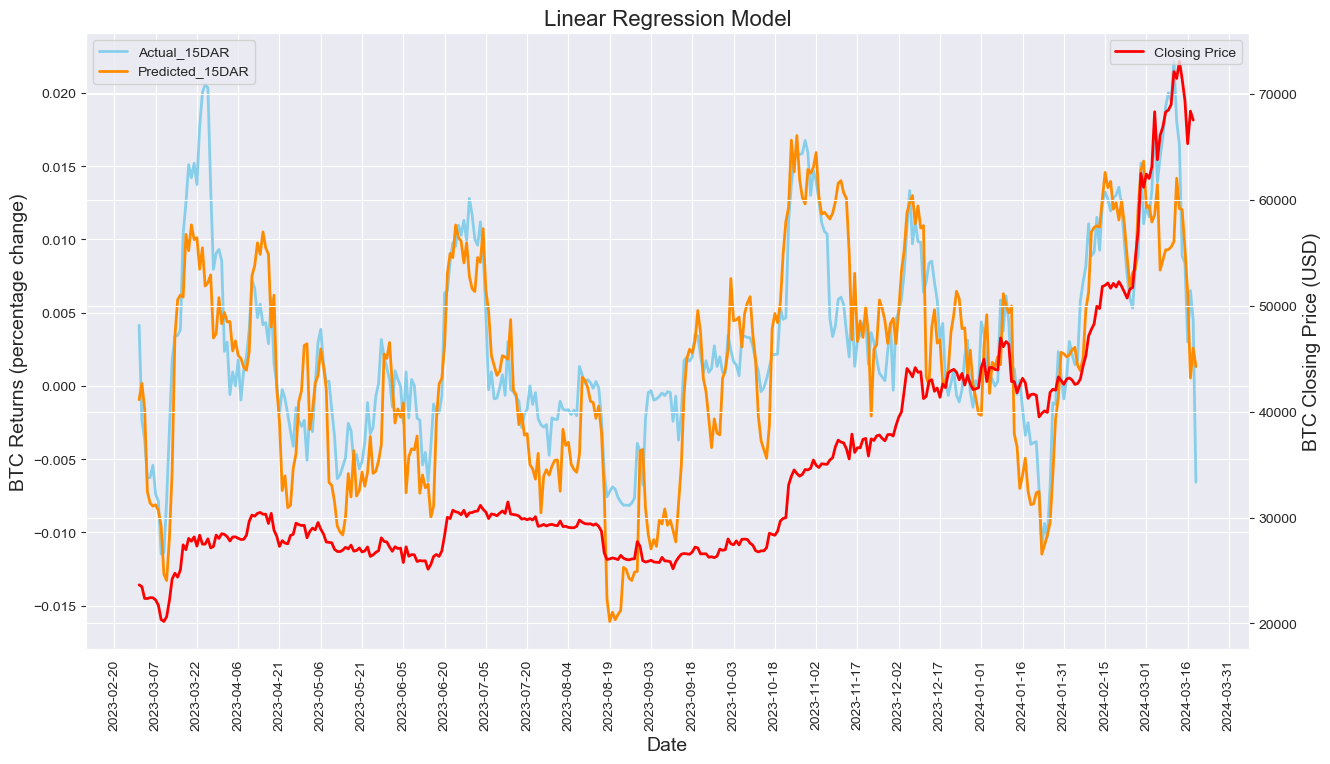

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("darkgrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot the y_test and y_pred
ax1.plot(results["y_test"], label="Actual_15DAR", linewidth=2, color="skyblue")
ax1.plot(results["y_pred"], label="Predicted_15DAR", linewidth=2, color="darkorange")

# Set the title and labels
ax1.set_title("Linear Regression Model", fontsize=16)
ax1.set_ylabel("BTC Returns (percentage change)", fontsize=14)
ax1.set_xlabel("Date", fontsize=14)

days_fmt = mdates.DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(days_fmt)
# Set x-axis major ticks to occur every 5 days.
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=15))

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add a legend
ax1.legend(loc="upper left")

# plot the close price on the same graph on the right axis
ax2 = ax1.twinx()
ax2.plot(daily_close, color="red", label="Closing Price", linewidth=2)
ax2.set_ylabel("BTC Closing Price (USD)", fontsize=14)
ax2.legend(loc="upper right")

plt.show()

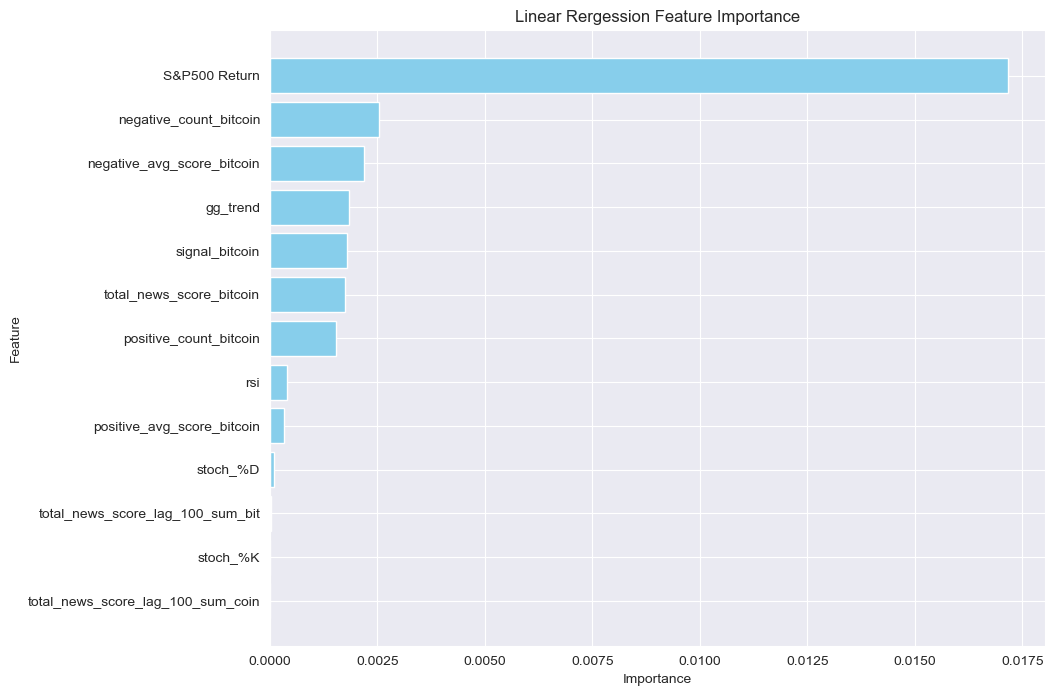

In [12]:
# Feature importance
importance = model.coef_
feature_importance = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": importance}
)

# Sort by absolute value of importance
feature_importance["Importance"] = feature_importance["Importance"].abs()
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance["Feature"], feature_importance["Importance"], color="skyblue"
)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Linear Rergession Feature Importance")
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at top
plt.show()

**Random Forest Implementatin**

In [13]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np


def train_evaluate_and_plot(X_train, y_train, X_test, y_test, daily_close, plot_title):
    """Train, evaluate and plot a random forest model."""
    model = RandomForestRegressor()
    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    r_squared = model.score(X_test, y_test)
    print(f"R Squared: {r_squared}")

    # make a dataframe with y_test and y_pred
    results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

    # compute residuals
    results["residuals"] = results["y_test"] - results["y_pred"]

    # Set the style of seaborn
    sns.set_style("darkgrid")

    # plot results
    plt.figure(figsize=(15, 8))
    plt.plot(results["y_test"], label="Actual_15DAR", linewidth=2)
    plt.plot(results["y_pred"], label="Predicted_15DAR", linewidth=2)
    plt.legend(loc="upper center")
    plt.title(plot_title, fontsize=16)
    plt.xticks(rotation=90)
    days_fmt = mdates.DateFormatter("%Y-%m-%d")
    plt.gca().xaxis.set_major_formatter(days_fmt)
    # Set x-axis major ticks to occur every 15 days.
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
    plt.ylabel("BTC Returns (percentage change)", fontsize=14)

    # plot the close price on the same graph on the right axis
    ax2 = plt.twinx()
    ax2.plot(daily_close, color="red", label="Close", linewidth=2)
    ax2.legend(loc="upper left")
    ax2.set_ylabel("BTC Close Price (USD)", fontsize=14)

    plt.xticks(rotation=90)
    plt.show()

    # feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. {X_train.columns[indices[f]]} ({importances[indices[f]]})")

    # Plot the feature importances of the forest
    plt.figure(figsize=(15, 8))
    plt.title("Feature importances", fontsize=16)
    plt.bar(
        range(X_train.shape[1]), importances[indices], align="center", color="skyblue"
    )
    plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])

    plt.show()

    return model, results

Mean Squared Error: 1.3960836438010309e-05
R Squared: 0.6691216606209831


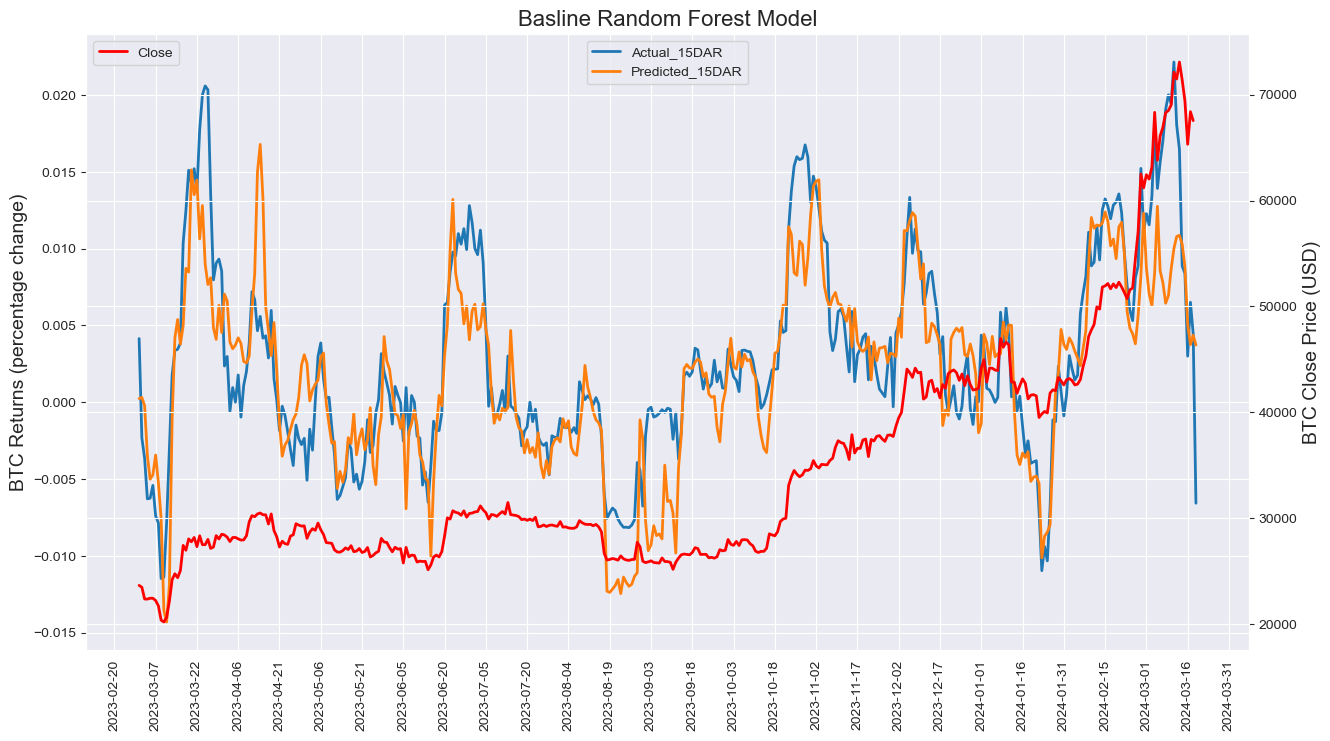

Feature ranking:
1. rsi (0.41320969313966527)
2. stoch_%D (0.3169269644952369)
3. macd (0.021744459812645524)
4. stoch_%K (0.019710161216682263)
5. TWITTER_NEG_SENTIMENT_COUNT (0.013315175118843916)
6. S&P500 Close (0.012902806720152635)
7. S&P500_Close_lag2 (0.011602391536067624)
8. DGS10 (0.010445552502455026)
9. ATR (0.009937577556855802)
10. neutral_avg_score_coinbase (0.006148571375010245)
11. S&P500_Close_lag1 (0.0061022687969948235)
12. macd_signal (0.005981278189991426)
13. 30D_Moving_STD (0.005733940722417436)
14. gg_trend (0.005520704995267804)
15. DGS10_lag1 (0.005351895666645391)
16. TWITTER_SENTIMENT_DAILY_AVG (0.005310882152411969)
17. negative_avg_score_coinbase (0.004544021739716401)
18. positive_avg_score_coinbase (0.0043431910170617675)
19. Lower Band (0.004161068382479231)
20. total_news_score_coinbase (0.004156113626648567)
21. Volume (0.004138146038687199)
22. negative_avg_score_bitcoin (0.004073565185237246)
23. TWITTER_PUBLICATION_COUNT (0.004029906935963856)
24.

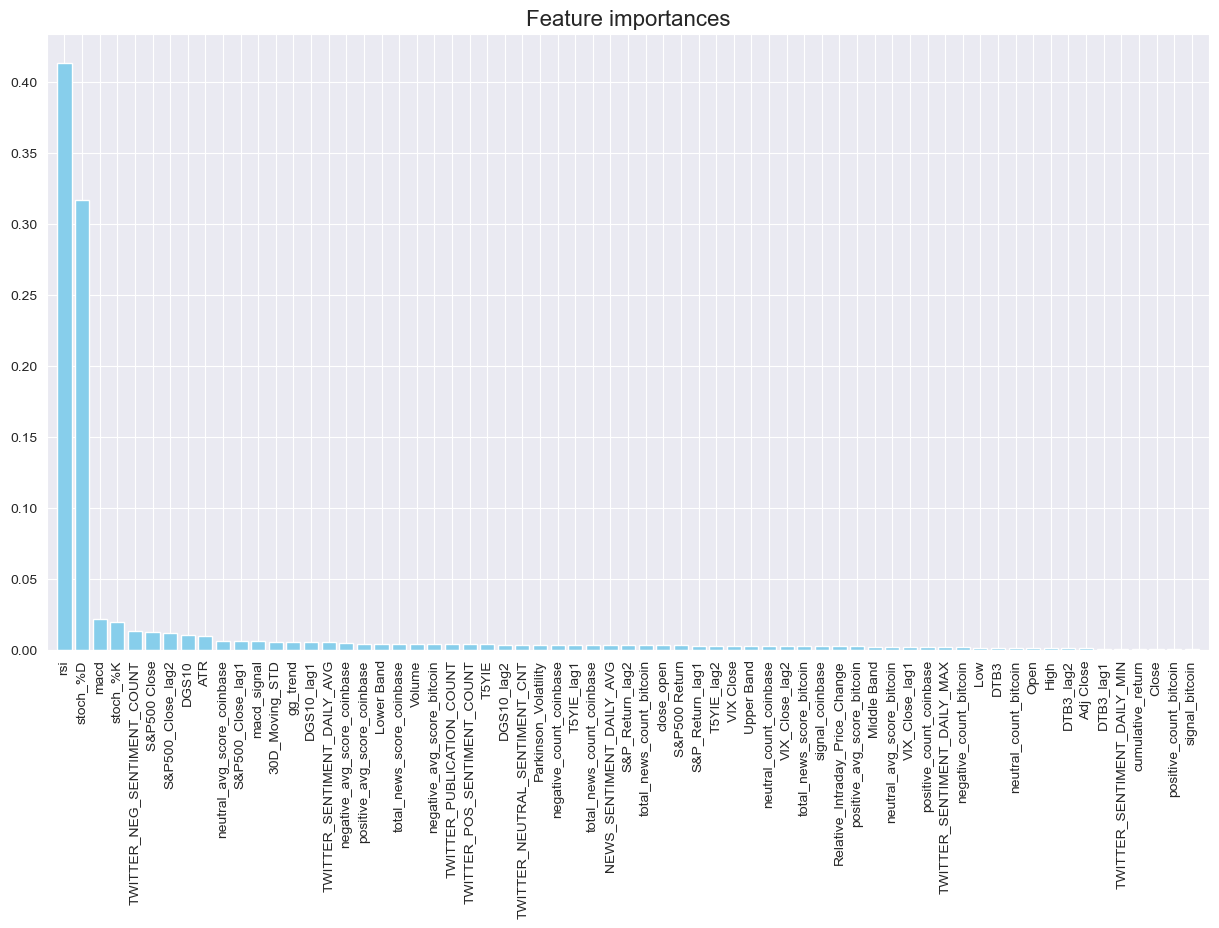

In [14]:
# random forest model
data = data.dropna(subset=["Daily_Return_rolling_15_avg"])

X = data.drop(
    columns=[
        "Daily_Return_rolling_15_avg",
        "Daily Return",
    ]
)
y = data["Daily_Return_rolling_15_avg"]


split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

model, results = train_evaluate_and_plot(
    X_train, y_train, X_test, y_test, daily_close, "Basline Random Forest Model"
)

In [15]:
all_features_wo_memory = X.columns
all_features_wo_memory

Index(['positive_count_bitcoin', 'negative_count_bitcoin',
       'neutral_count_bitcoin', 'positive_avg_score_bitcoin',
       'negative_avg_score_bitcoin', 'neutral_avg_score_bitcoin',
       'total_news_count_bitcoin', 'total_news_score_bitcoin',
       'signal_bitcoin', 'TWITTER_SENTIMENT_DAILY_AVG',
       'TWITTER_PUBLICATION_COUNT', 'TWITTER_NEG_SENTIMENT_COUNT',
       'TWITTER_POS_SENTIMENT_COUNT', 'TWITTER_SENTIMENT_DAILY_MAX',
       'TWITTER_NEUTRAL_SENTIMENT_CNT', 'TWITTER_SENTIMENT_DAILY_MIN',
       'NEWS_SENTIMENT_DAILY_AVG', 'positive_count_coinbase',
       'negative_count_coinbase', 'neutral_count_coinbase',
       'positive_avg_score_coinbase', 'negative_avg_score_coinbase',
       'neutral_avg_score_coinbase', 'total_news_count_coinbase',
       'total_news_score_coinbase', 'signal_coinbase', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume', 'close_open', 'cumulative_return',
       '30D_Moving_STD', 'Parkinson_Volatility',
       'Relative_Intraday_Pri

In [16]:
# calculate metrics for direction
results["actual_direction"] = results["y_test"].apply(lambda x: 1 if x > 0 else 0)
results["Pred_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

tp = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 1)
].shape[0]
fp = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 1)
].shape[0]
fn = results[
    (results["actual_direction"] == 1) & (results["Pred_direction"] == 0)
].shape[0]
tn = results[
    (results["actual_direction"] == 0) & (results["Pred_direction"] == 0)
].shape[0]

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Negatives: {tn}")

# calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision}")

# calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall}")

# calculate f1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1}")

# calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy}")

True Positives: 213
False Positives: 24
False Negatives: 27
True Negatives: 121
Precision: 0.8987341772151899
Recall: 0.8875
F1 Score: 0.8930817610062892
Accuracy: 0.8675324675324675


**ROlling sum Features Experiment**

Mean Squared Error: 1.1302267653734982e-05
R Squared: 0.7321309816148821


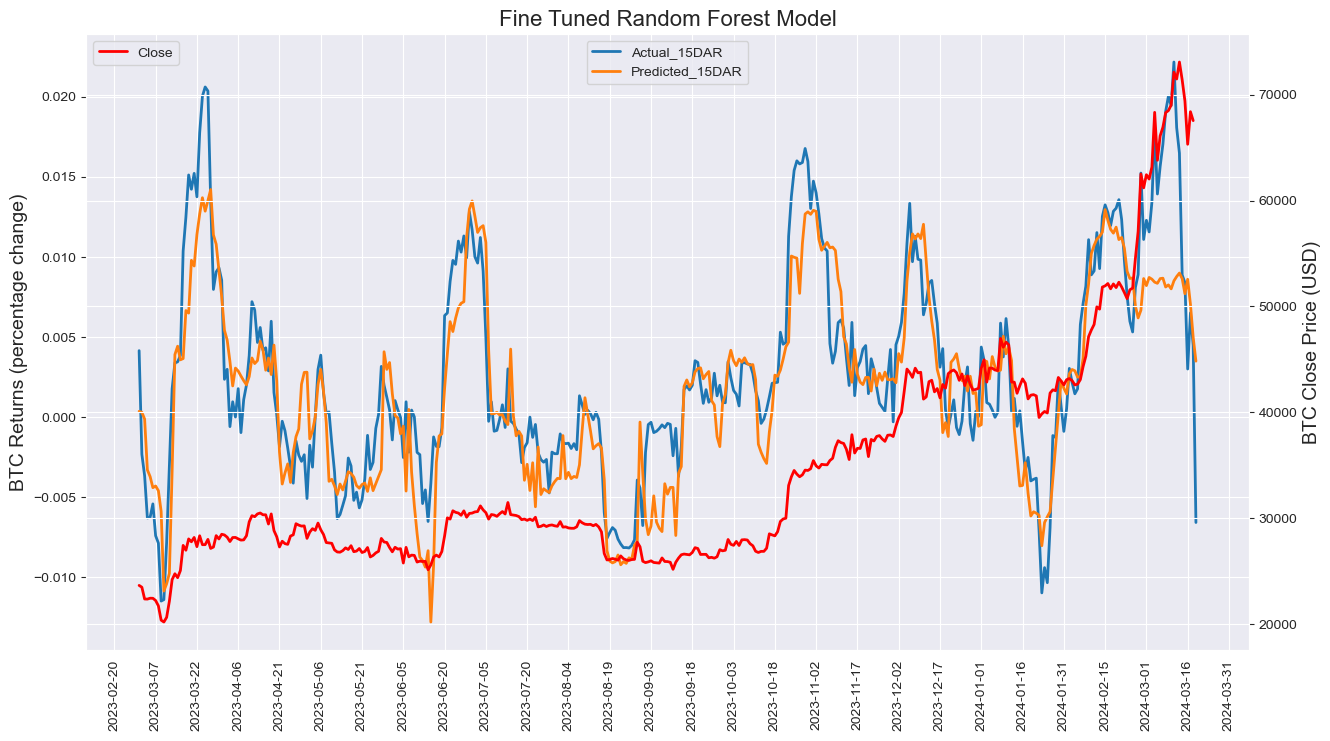

Feature ranking:
1. rsi (0.334239690892862)
2. stoch_%D (0.2167294834259405)
3. stoch_%K_rolling_10 (0.08525716625240114)
4. Relative_Intraday_Price_Change_rolling_10 (0.03315147330823288)
5. negative_count_coinbase_rolling_10 (0.02736825312983437)
6. stoch_%K (0.022204784852905616)
7. total_news_score_coinbase_rolling_10 (0.01258298048113111)
8. close_open_rolling_20 (0.012499667089604967)
9. Relative_Intraday_Price_Change_rolling_20 (0.01202035955348648)
10. close_open_rolling_10 (0.011273684748849296)
11. gg_trend_rolling_30 (0.009560768222955799)
12. stoch_%D_rolling_10 (0.009213592988708268)
13. gg_trend_rolling_20 (0.008903490838115488)
14. T5YIE_rolling_20 (0.005201395357481443)
15. macd_signal_rolling_20 (0.00441555724606476)
16. total_news_score_bitcoin_rolling_30 (0.003653050082340908)
17. S&P500 Close (0.0036381536840084895)
18. negative_count_bitcoin_rolling_10 (0.0033220305142804525)
19. S&P500 Close_rolling_20 (0.002932355444747223)
20. neutral_avg_score_coinbase_rolling_

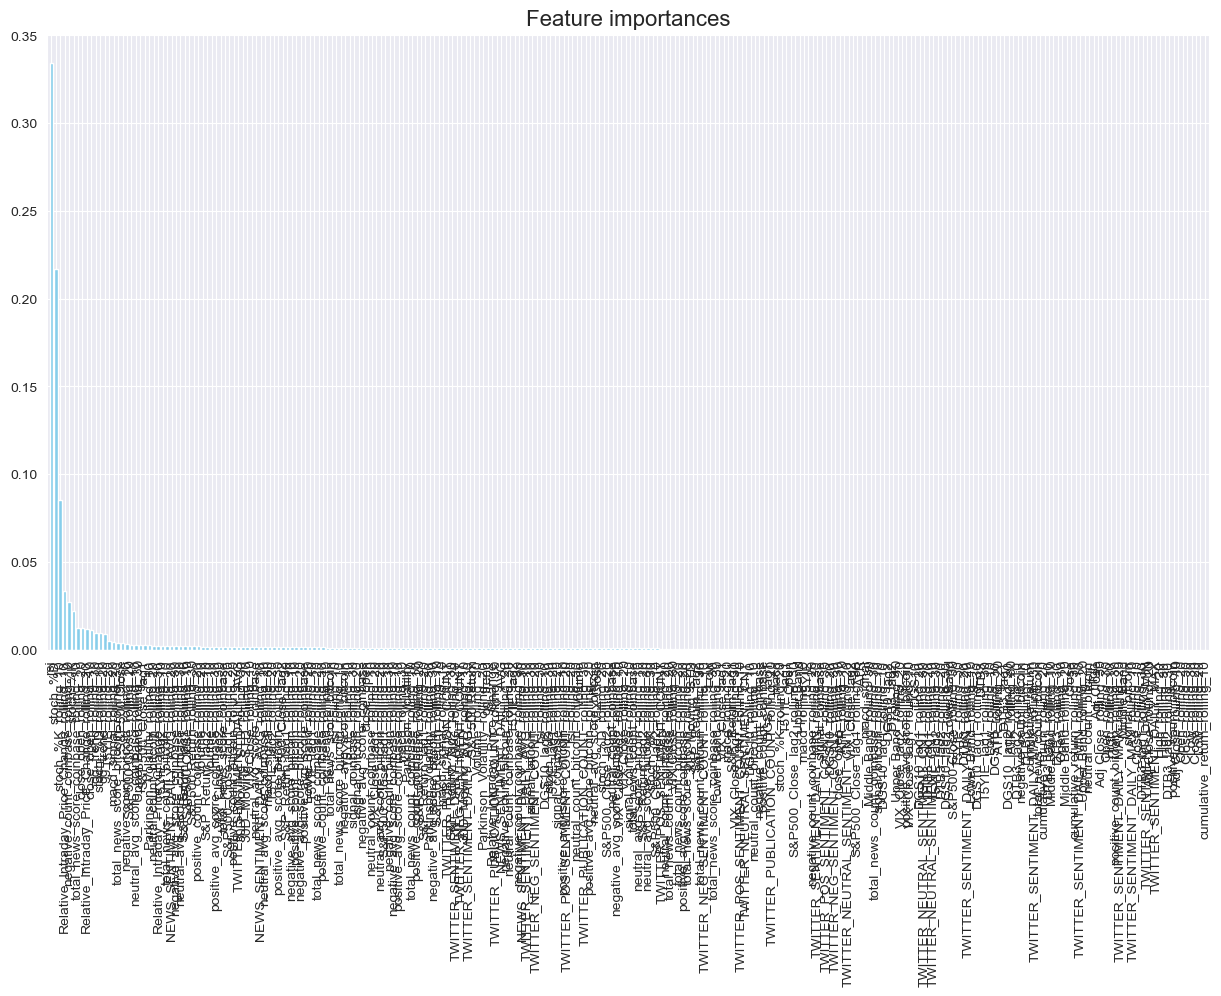

In [17]:
# Define the number of lags
n_lags = 3

# Create a new DataFrame for lagged features
lagged_features = []
lagged_features_cols = []

data = data.dropna(subset=["Daily_Return_rolling_15_avg"])

X_now = data.drop(
    columns=[
        "Daily_Return_rolling_15_avg",
        "Daily Return",
    ]
)
y_now = data["Daily_Return_rolling_15_avg"]

# Create lagged versions of features
for column in X_now.columns:
    for lag in range(1, n_lags + 1):
        lagged_features.append(X_now[column].rolling(lag * 10).sum())
        lagged_features_cols.append(f"{column}_rolling_{lag * 10}")

lagged_features = pd.concat(lagged_features, axis=1)
lagged_features.columns = lagged_features_cols

# Concatenate the original DataFrame with the DataFrame of lagged features
X_now = pd.concat([X_now, lagged_features], axis=1)


# Drop rows with NaN values caused by lagging in both X and y
X_now = X_now.dropna()
X_all = X_now.copy()
y_now = y_now[X_now.index]
y_all = y_now.copy()

# Split the data again after creating lagged features
X_train = X_now[X_now.index < split_date]
X_test = X_now[X_now.index >= split_date]
y_train = y_now[y_now.index < split_date]
y_test = y_now[y_now.index >= split_date]

# Train, evaluate, and plot the model
model, results = train_evaluate_and_plot(
    X_train, y_train, X_test, y_test, daily_close, "Fine Tuned Random Forest Model"
)

In [18]:
all_features_w_memory = X_now.columns
all_features_w_memory

Index(['positive_count_bitcoin', 'negative_count_bitcoin',
       'neutral_count_bitcoin', 'positive_avg_score_bitcoin',
       'negative_avg_score_bitcoin', 'neutral_avg_score_bitcoin',
       'total_news_count_bitcoin', 'total_news_score_bitcoin',
       'signal_bitcoin', 'TWITTER_SENTIMENT_DAILY_AVG',
       ...
       'VIX_Close_lag2_rolling_30', 'S&P_Return_lag1_rolling_10',
       'S&P_Return_lag1_rolling_20', 'S&P_Return_lag1_rolling_30',
       'S&P_Return_lag2_rolling_10', 'S&P_Return_lag2_rolling_20',
       'S&P_Return_lag2_rolling_30', 'gg_trend_rolling_10',
       'gg_trend_rolling_20', 'gg_trend_rolling_30'],
      dtype='object', length=260)

**Making another model with best features**

Mean Squared Error: 1.1133452520200604e-05
R Squared: 0.7361319790690048


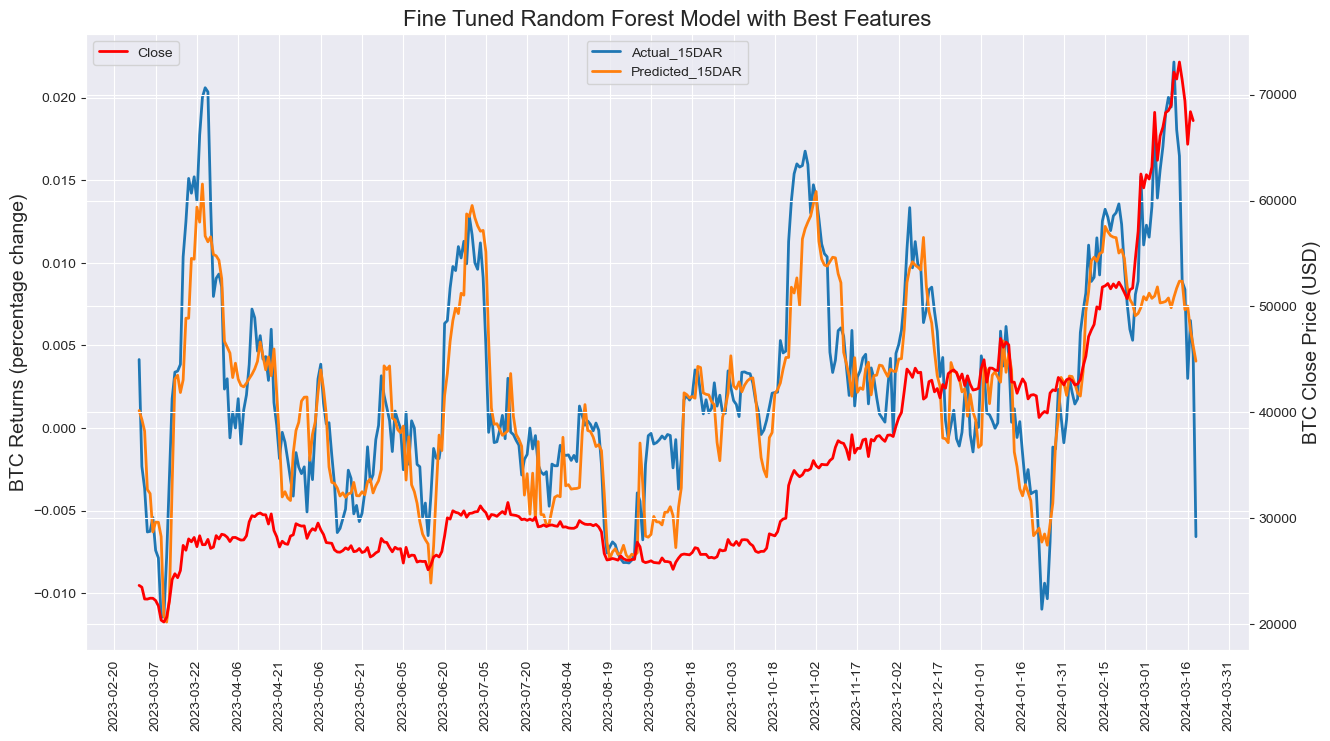

Feature ranking:
1. rsi (0.3407153276338436)
2. stoch_%D (0.22908573397043908)
3. stoch_%K_rolling_10 (0.07139544934180614)
4. Relative_Intraday_Price_Change_rolling_10 (0.049092601982247)
5. stoch_%K (0.03172636195554806)
6. negative_count_coinbase_rolling_10 (0.027692912942634325)
7. close_open_rolling_20 (0.01834586689531082)
8. Relative_Intraday_Price_Change_rolling_20 (0.017076398590297286)
9. stoch_%D_rolling_10 (0.016561557980647925)
10. gg_trend_rolling_30 (0.015679005897836825)
11. T5YIE_rolling_20 (0.014845088309424772)
12. gg_trend_rolling_20 (0.012623531700020587)
13. macd_signal_rolling_20 (0.012357999915954045)
14. S&P500 Close_rolling_20 (0.01199182807335988)
15. close_open_rolling_10 (0.011334860183384003)
16. total_news_score_coinbase_rolling_10 (0.011255456702883795)
17. negative_count_bitcoin_rolling_10 (0.010609587017824646)
18. S&P500 Close (0.009528802580123055)
19. neutral_avg_score_coinbase_rolling_10 (0.009285964310559718)
20. total_news_score_bitcoin_rolling_3

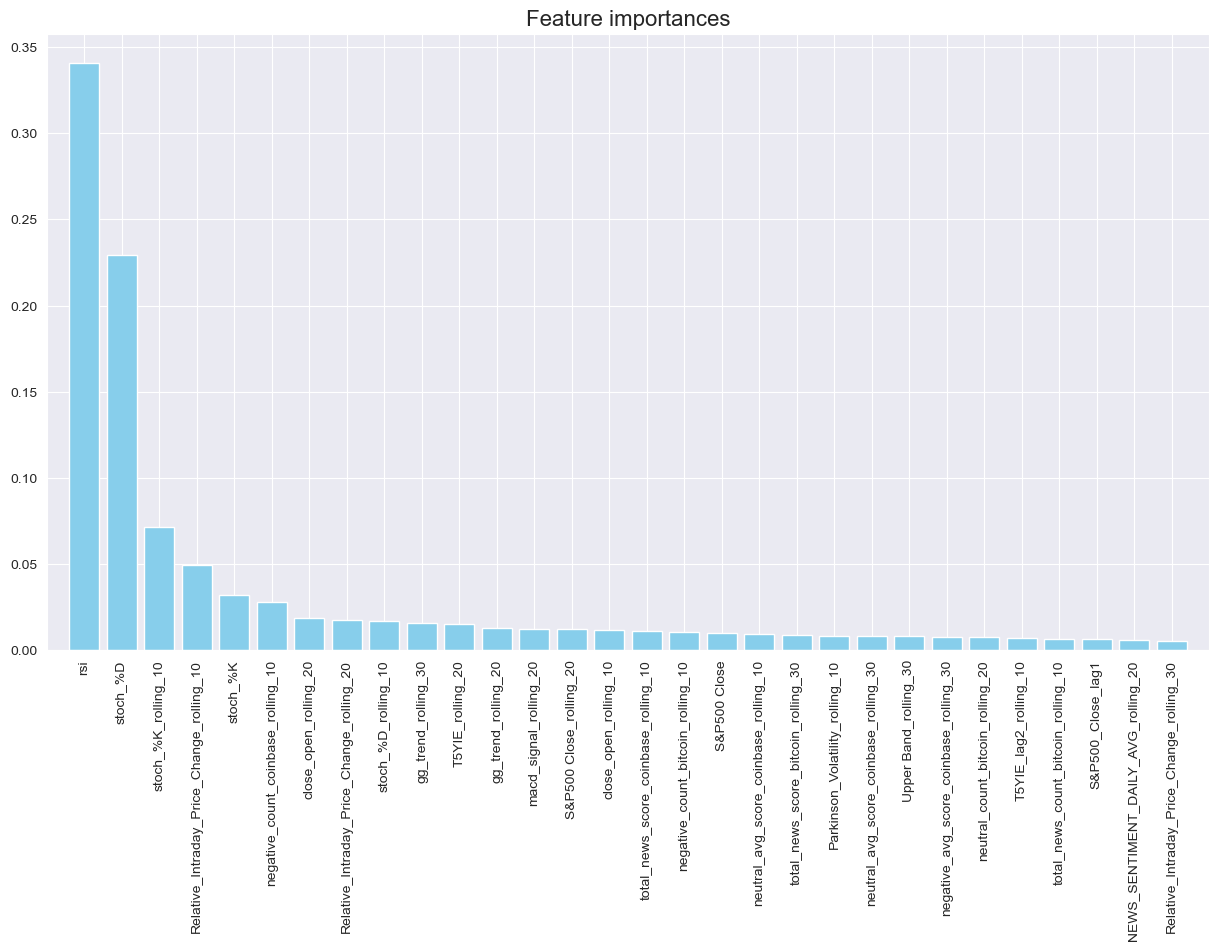

In [19]:
# make another model with best features from the above random forest model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
cols = np.array(X_train.columns)[indices][:30]
X = X_now[cols]
y = y_now

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

model, results = train_evaluate_and_plot(
    X_train,
    y_train,
    X_test,
    y_test,
    daily_close,
    "Fine Tuned Random Forest Model with Best Features",
)

In [20]:
best_features = cols
best_features

array(['rsi', 'stoch_%D', 'stoch_%K_rolling_10',
       'Relative_Intraday_Price_Change_rolling_10',
       'negative_count_coinbase_rolling_10', 'stoch_%K',
       'total_news_score_coinbase_rolling_10', 'close_open_rolling_20',
       'Relative_Intraday_Price_Change_rolling_20',
       'close_open_rolling_10', 'gg_trend_rolling_30',
       'stoch_%D_rolling_10', 'gg_trend_rolling_20', 'T5YIE_rolling_20',
       'macd_signal_rolling_20', 'total_news_score_bitcoin_rolling_30',
       'S&P500 Close', 'negative_count_bitcoin_rolling_10',
       'S&P500 Close_rolling_20', 'neutral_avg_score_coinbase_rolling_10',
       'Upper Band_rolling_30', 'S&P500_Close_lag1',
       'Parkinson_Volatility_rolling_10',
       'neutral_count_bitcoin_rolling_20',
       'Relative_Intraday_Price_Change_rolling_30',
       'T5YIE_lag2_rolling_10', 'total_news_count_bitcoin_rolling_10',
       'NEWS_SENTIMENT_DAILY_AVG_rolling_20',
       'negative_avg_score_coinbase_rolling_30',
       'neutral_avg_score_c

In [21]:
def calculat_direction_metrics(results):
    """Calculate the direction metrics."""
    # calculate metrics for direction
    results["actual_direction"] = results["y_test"].apply(lambda x: 1 if x > 0 else 0)
    results["Pred_direction"] = results["y_pred"].apply(lambda x: 1 if x > 0 else 0)

    tp = results[
        (results["actual_direction"] == 1) & (results["Pred_direction"] == 1)
    ].shape[0]
    fp = results[
        (results["actual_direction"] == 0) & (results["Pred_direction"] == 1)
    ].shape[0]
    fn = results[
        (results["actual_direction"] == 1) & (results["Pred_direction"] == 0)
    ].shape[0]
    tn = results[
        (results["actual_direction"] == 0) & (results["Pred_direction"] == 0)
    ].shape[0]

    # print(f"Result of {str(model)}, {str(feature)}:")
    # print(f"True Positives: {tp}")
    # print(f"False Positives: {fp}")
    # print(f"False Negatives: {fn}")
    # print(f"True Negatives: {tn}")

    # calculate precision
    precision = tp / (tp + fp)
    # print(f"Precision: {precision}")

    # calculate recall
    recall = tp / (tp + fn)
    # print(f"Recall: {recall}")

    # calculate f1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"Direction F1 Score: {f1}")

    # calculate accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print(f"Direction Accuracy: {accuracy}")

    return tp, fp, fn, tn, precision, recall, f1, accuracy

In [22]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np


def train_evaluate(mdl, X_train, y_train, X_test, y_test):
    """Train, evaluate and plot a random forest model."""
    # model = RandomForestRegressor()
    # model = LinearRegression()
    model = mdl
    # fit model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # evaluate model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    r_squared = model.score(X_test, y_test)
    print(f"R Squared: {r_squared}")

    # make a dataframe with y_test and y_pred
    results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

    # compute residuals
    results["residuals"] = results["y_test"] - results["y_pred"]

    return model, results

In [23]:
def calculat_magnitude_metrics(results):
    """Calculate the magnitude metrics."""
    results["daily_price_change_in_dollars"] = results["closing_price"].diff()
    # magnitude bins less than -1320, -1320, -989, -990, -659, -660, -329, 3320, -1, 0, 330, 330, 660, 660 ,990 ,990 ,1320 and up
    bins = [-np.inf, -1320, -989, -659, -329, -1, 330, 660, 990, 1320, np.inf]
    labels = [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
    ]

    results["magnitude_bins"] = pd.cut(
        results["daily_price_change_in_dollars"], bins=bins, labels=labels
    )
    results[["magnitude_bins", "daily_price_change_in_dollars"]]
    results["predicted_price_change_in_dollars"] = results["y_pred"] * results[
        "open_price"
    ].shift(1)
    results["predicted_magnitude_bins"] = pd.cut(
        results["predicted_price_change_in_dollars"], bins=bins, labels=labels
    )
    results[
        [
            "predicted_magnitude_bins",
            "magnitude_bins",
        ]
    ]

    results = results.dropna()

    # calculate F1 score of this multi class classification
    from sklearn.metrics import f1_score

    f1 = f1_score(
        results["magnitude_bins"],
        results["predicted_magnitude_bins"],
        average="weighted",
    )

    print(f"Magnitude F1 Score: {f1}")

    # calculate accuracy
    accuracy = (
        results["magnitude_bins"] == results["predicted_magnitude_bins"]
    ).sum() / len(results)

    print(f"Magnitude Accuracy: {accuracy}")

In [24]:
feature_sets = {}
# feature_sets["baseline_features"]=baseline_features
feature_sets["all_features_wo_memory"] = all_features_wo_memory
feature_sets["all_features_w_memory"] = all_features_w_memory
feature_sets["best_features"] = best_features

In [25]:
mdl_sets = {}
mdl_sets["LinearRegression"] = LinearRegression()
mdl_sets["RandomForestRegressor"] = RandomForestRegressor()

In [26]:
for f_key, f_value in feature_sets.items():

    for m_key, m_value in mdl_sets.items():
        print(f"Results for {m_key}, {f_key}:")
        X = X_all[f_value]
        y = y_all

        split_date = "2023-03-01"
        X_train = X[X.index < split_date]
        X_test = X[X.index >= split_date]
        y_train = y[y.index < split_date]
        y_test = y[y.index >= split_date]

        model, results = train_evaluate(
            m_value,
            X_train,
            y_train,
            X_test,
            y_test,
        )
        calculat_direction_metrics(results)
        # use the prdicted moving average to make a trading strategy
        results["predicted_direction"] = results["y_pred"].apply(
            lambda x: 1 if x > 0 else 0
        )

        # if predicted direction is 1 for 15 days in a row, buy
        results["buy"] = results["predicted_direction"].shift(1) == 1 & (
            results["predicted_direction"].shift(2) == 1
        ) & (results["predicted_direction"].shift(3) == 1) & (
            results["predicted_direction"].shift(4) == 1
        )

        # if predicted direction is 0 for three days in a row, sell
        results["sell"] = results["predicted_direction"].shift(1) == 0 & (
            results["predicted_direction"].shift(2) == 0
        ) & (results["predicted_direction"].shift(3) == 0) & (
            results["predicted_direction"].shift(4) == 0
        )

        results["closing_price"] = daily_close

        results["open_price"] = daily_open

        # if declinining in the last 5 days, sell
        results["sell_2"] = results["sell"] | (
            results["closing_price"].shift(1) < results["closing_price"].shift(2)
        ) & (results["closing_price"].shift(2) < results["closing_price"].shift(3)) & (
            results["closing_price"].shift(3) < results["closing_price"].shift(4)
        ) & (
            results["closing_price"].shift(4) < results["closing_price"].shift(5)
        ) & (
            results["closing_price"].shift(5) < results["closing_price"].shift(6)
        ) & (
            results["closing_price"].shift(6) < results["closing_price"].shift(7)
        ) & (
            results["closing_price"].shift(7) < results["closing_price"].shift(8)
        ) & (
            results["closing_price"].shift(8) < results["closing_price"].shift(9)
        ) & (
            results["closing_price"].shift(9) < results["closing_price"].shift(10)
        )

        results["buy_previous"] = results["buy"].shift(1)
        results["change_buy"] = False
        results["change_sell"] = False
        calculat_magnitude_metrics(results)
        print("\n")

Results for LinearRegression, all_features_wo_memory:
Mean Squared Error: 1.559911245006502e-05
R Squared: 0.6302937545195063
Direction F1 Score: 0.8144796380090499
Direction Accuracy: 0.787012987012987
Magnitude F1 Score: 0.16465164992403122
Magnitude Accuracy: 0.21671018276762402


Results for RandomForestRegressor, all_features_wo_memory:
Mean Squared Error: 1.371962853996746e-05
R Squared: 0.67483840038109
Direction F1 Score: 0.8972746331236897
Direction Accuracy: 0.8727272727272727
Magnitude F1 Score: 0.16667598402211276
Magnitude Accuracy: 0.2193211488250653


Results for LinearRegression, all_features_w_memory:
Mean Squared Error: 0.0018065987126304874
R Squared: -41.81723266465246
Direction F1 Score: 0.7597955706984667
Direction Accuracy: 0.6337662337662338
Magnitude F1 Score: 0.10832760473556186
Magnitude Accuracy: 0.13054830287206268


Results for RandomForestRegressor, all_features_w_memory:
Mean Squared Error: 1.1495931615930461e-05
R Squared: 0.7275410553240521
Direction F